In [1]:
import pandas as pd
import geopandas as gpd

C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\1259499560.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [4]:
cfs_CE = pd.read_csv(r'C:\Users\owusup\Desktop\Model\MacroCEM_EIM\Python\Results_NoZoning_SGenFrac0_WGenFrac0_EI_CO2Final_32448000_EIMs_ValueAdded_SolarTxAll_CAPEX_1.0_costWgt_1.0\2040CO2Cap32\CE\windAndSolarNewCFsCE2040.csv', index_col=0)
cfs_Full = pd.read_csv(r'C:\Users\owusup\Desktop\Model\MacroCEM_EIM\Python\Results_NoZoning_SGenFrac0_WGenFrac0_EI_CO2Final_32448000_EIMs_ValueAdded_SolarTxAll_CAPEX_1.0_costWgt_1.0\2040CO2Cap32\CE\windSolarNewCFsFullYr2040.csv', index_col=0)

In [5]:
cfs_Full = cfs_Full.T
cfs_Full['mean'] = cfs_Full.mean(axis=1)
cfs_Full = cfs_Full[['mean']].reset_index()
cfs_Full.reset_index(inplace=True)
cfs_Full['tech'] = cfs_Full['index'].apply(lambda x: 'Solar' if 'solar' in x else ('Wind' if 'wind' in x else 'Unknown'))
cfs_Full_solar = cfs_Full[cfs_Full['tech']=='Solar']
cfs_Full_solar['lat'] = cfs_Full_solar['index'].str.extract(r'lat([-\d.]+)').astype(float)
cfs_Full_solar['lon'] = cfs_Full_solar['index'].str.extract(r'lon([-\d.]+)').astype(float)
cfs_Full_solar = cfs_Full_solar.drop(columns=['index'])



C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\475592832.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfs_Full_solar['lat'] = cfs_Full_solar['index'].str.extract(r'lat([-\d.]+)').astype(float)
C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\475592832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfs_Full_solar['lon'] = cfs_Full_solar['index'].str.extract(r'lon([-\d.]+)').astype(float)


In [6]:
cfs_Full_solar

,level_0,mean,tech,lat,lon
0,0,0.147233,Solar,44.685408,-83.593725
1,1,0.153522,Solar,42.591273,-85.888435
2,2,0.143590,Solar,45.034866,-83.625807
3,3,0.144216,Solar,44.999079,-85.140234
4,4,0.152120,Solar,44.064658,-83.894034
...,...,...,...,...,...
73,73,0.156283,Solar,41.954678,-86.412265
74,74,0.155806,Solar,41.915361,-85.993487
75,75,0.154209,Solar,42.245461,-85.531181
76,76,0.156096,Solar,41.914446,-85.527761


In [7]:
from SetupTransmissionAndZones import importCountysubs, importPRegions, importCounty
counties = importCounty()

c:\Users\owusup\Desktop\Model\MacroCEM_EIM\Python\SetupTransmissionAndZones.py:113: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countyShapes['centroid'] = countyShapes['geometry'].centroid


In [8]:
counties

,STATE,CNTY_GEOID,CNTY_NAME,geometry,CNTY_LAT,CNTY_LON
0,IL,17091,Kankakee,"POLYGON ((-88.25150 41.11422, -88.24089 41.114...",41.1377,-87.8618
1,IL,17187,Warren,"POLYGON ((-90.78965 40.63685, -90.78956 40.642...",40.8488,-90.6150
2,IL,17197,Will,"POLYGON ((-88.26127 41.72466, -88.25477 41.724...",41.4450,-87.9786
3,IN,18027,Daviess,"POLYGON ((-87.27917 38.69394, -87.27262 38.696...",38.7024,-87.0720
4,IN,18061,Harrison,"POLYGON ((-86.32768 38.18274, -86.32441 38.182...",38.1952,-86.1113
...,...,...,...,...,...,...
519,MN,27113,Pennington,"POLYGON ((-96.50103 48.10869, -96.50084 48.174...",48.0662,-96.0367
520,IL,17065,Hamilton,"POLYGON ((-88.70660 37.92190, -88.70644 37.927...",38.0815,-88.5391
521,OH,39075,Holmes,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",40.5612,-81.9293
522,WI,55079,Milwaukee,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",43.0072,-87.9668


In [9]:
counties = counties[counties['STATE']=='MI']

c:\Users\owusup\Anaconda3\envs\py38GAMS\lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\2182508641.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  cfs_Full_solar_ = gpd.sjoin(cfs_Full_solar, counties, how='right', op='intersects')
C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\2182508641.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead

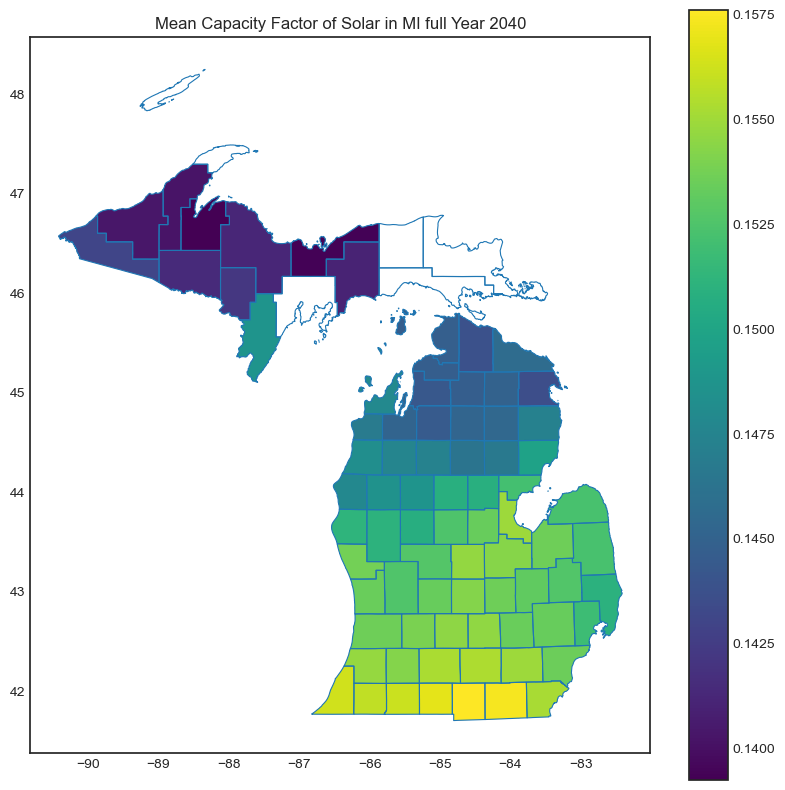

In [10]:
# import geopandas as gpd
cfs_Full_solar = gpd.GeoDataFrame(cfs_Full_solar, geometry=gpd.points_from_xy(cfs_Full_solar.lon, cfs_Full_solar.lat))
counties = gpd.GeoDataFrame(counties, geometry='geometry')

cfs_Full_solar_ = gpd.sjoin(cfs_Full_solar, counties, how='right', op='intersects')
#remove nan values in mean
cfs_Full_solar_ = cfs_Full_solar_[cfs_Full_solar_['mean'].notna()]
cfs_Full_solar__ = cfs_Full_solar_[~(cfs_Full_solar_['mean']==0)]

#plot the mean
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# Plot of the mean capacity factor
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust these values to your preferred size
cfs_Full_solar__.plot(column='mean', 
             cmap='viridis', 
             legend=True,
             linewidth=0.8, ax=ax)
counties.boundary.plot(ax=ax, linewidth=0.8)
plt.title('Mean Capacity Factor of Solar in MI full Year 2040')
plt.show()


In [11]:
cfs_CE = cfs_CE.T
cfs_CE['mean'] = cfs_CE.mean(axis=1)
cfs_CE = cfs_CE[['mean']].reset_index()
cfs_CE.reset_index(inplace=True)
cfs_CE['tech'] = cfs_CE['index'].apply(lambda x: 'Solar' if 'solar' in x else ('Wind' if 'wind' in x else 'Unknown'))
cfs_CE_solar = cfs_CE[cfs_CE['tech']=='Solar']
cfs_CE_solar['lat'] = cfs_CE_solar['index'].str.extract(r'lat([-\d.]+)').astype(float)
cfs_CE_solar['lon'] = cfs_CE_solar['index'].str.extract(r'lon([-\d.]+)').astype(float)
cfs_CE_solar = cfs_CE_solar.drop(columns=['index'])


C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\2818493991.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfs_CE_solar['lat'] = cfs_CE_solar['index'].str.extract(r'lat([-\d.]+)').astype(float)
C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\2818493991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfs_CE_solar['lon'] = cfs_CE_solar['index'].str.extract(r'lon([-\d.]+)').astype(float)


c:\Users\owusup\Anaconda3\envs\py38GAMS\lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\1183768229.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  cfs_CE_solar_ = gpd.sjoin(cfs_CE_solar, counties, how='right', op='intersects')
C:\Users\owusup\AppData\Local\Temp\ipykernel_14056\1183768229.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  

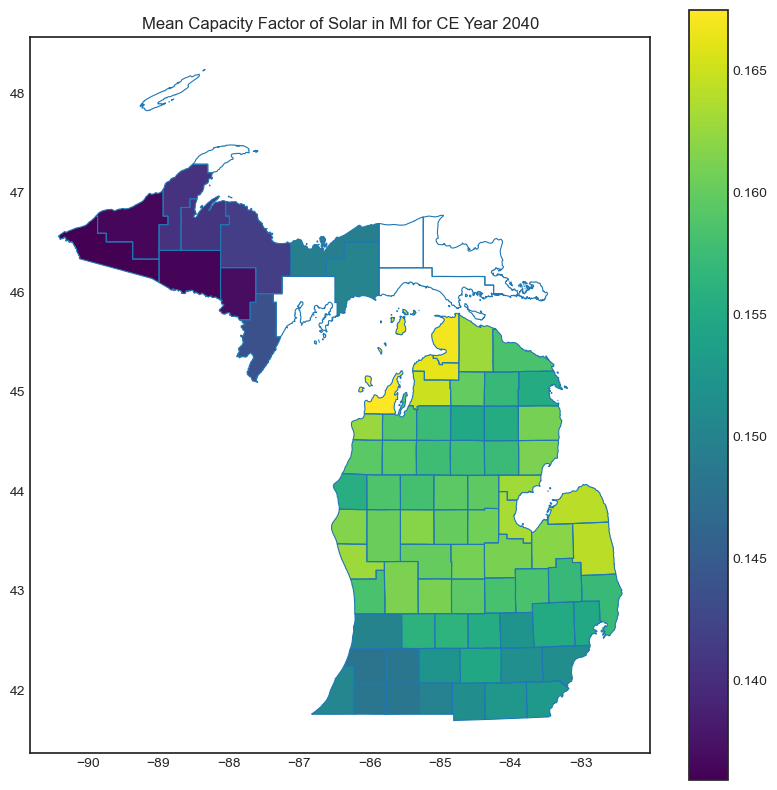

In [12]:
# import geopandas as gpd
cfs_CE_solar = gpd.GeoDataFrame(cfs_CE_solar, geometry=gpd.points_from_xy(cfs_CE_solar.lon, cfs_Full_solar.lat))
counties = gpd.GeoDataFrame(counties, geometry='geometry')

cfs_CE_solar_ = gpd.sjoin(cfs_CE_solar, counties, how='right', op='intersects')
#remove nan values in mean
cfs_CE_solar_ = cfs_CE_solar_[cfs_CE_solar_['mean'].notna()]
cfs_CE_solar__ = cfs_CE_solar_[~(cfs_CE_solar_['mean']==0)]

#plot the mean
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# Plot of the mean capacity factor
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust these values to your preferred size
cfs_CE_solar__.plot(column='mean', 
             cmap='viridis', 
             legend=True,
             linewidth=0.8, ax=ax)
counties.boundary.plot(ax=ax, linewidth=0.8)
plt.title('Mean Capacity Factor of Solar in MI for CE Year 2040')
plt.show()
